# Project: Write a Data Science blog
 
## The Ask:
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

* Prepare data:

* * Gather necessary data to answer your questions
* * Handle categorical and missing data
* * Provide insight into the methods you chose and why you chose them

* Analyze, Model, and Visualize

* * Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

* Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
* Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!
For this project, you will pick a dataset.  Using your dataset, you will choose 3 questions you aspire to answer from the data.

##  CRISP-DM recap

1) Business Understanding

2) Data Understanding

3) Data Preparation

4) Modelling

5) Evaluation

6) Deployment


## Business Understanding

Decided to review the following: https://check-payment-practices.service.gov.uk/export



### Background

From here: https://www.kaggle.com/saikiran0684/payment-practices-of-uk-buyers

Late payments remain a thorny issue for SMEs. Big businesses often continually fail to pay their suppliers on time which results in huge financial losses for suppliers esp SME suppliers all over the world. UK's modest-sized enterprises are currently owed £26 billion in overdue payments, according to research by payments processing company Bacs. On average, the 307 large businesses that filed payment reports to the UK government met invoice payments late 71 % of the time.

To arrest these morally unacceptable tactics, the UK Government has decided to make all the information public so that buyers are accountable in the future. It is aimed at helping suppliers to make more informed decisions about who they do business with. It also seeks to alleviate the administrative and financial burdens faced by thousands of small and medium-sized businesses due to late payments.

Under new rules introduced in April 2017, all large UK companies are required to publish specific information regarding their payment policies, practices, and performance - including the average time taken to pay supplier invoices - twice yearly. Failure to comply with the rules is a criminal offense and can result in a hefty fine.

This dataset is available under the Open Government Licence v3.0.

#### How to read the data?

The dataset contains records from 2017 onwards till Dec 2019. Each row of data contains:

* The reporting period (start date and end date or the duration for which the buyer company has to report the payment numbers)
* filing information (When did the company file the records)
* Whether Payments were made during the reporting period
* Payment Metrics like Average time to pay
* Distribution of Invoices spanned across different Payment duration buckets
* Standard Payment Period (Shortest and Longest)
* Typical Payment Contractual terms agreed with Suppliers
* Changes made in Payment terms and have suppliers been notified of changes
* Does this company offer e-invoicing in relation to qualifying contracts?
* Does this company offer supply chain finance?
* Under its payment practices and policies, can this business deduct sums from payments under qualifying contracts as a charge for remaining on a supplier list?
* During the reporting period, did the company deduct sums from payments as a charge for remaining on a supplier list?


#### Acknowledgements

Thanks to Govt of UK to make this data available publicly

#### Questions to address:
* What is the average time for a company to pay? 
* What proportopn of invoices are paid late?
* How about those companies that have signed up to the Prompt Payment Code?
* Do companies that offer financial solutions perform better?
* Are we seeing any improvements over time?



## Data Understanding



In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# magic word for producing visualizations in notebook
%matplotlib inline


The scikit-learn version is 0.20.3.


In [861]:
# Load in the data.
payments_data = pd.read_csv('payment-practices.csv')

#print(f'There are {nRow} rows and {nCol} columns')
payments_data.head(5)

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL
0,2,2017-04-29,2017-10-28,2017-11-07,MEDTRONIC LIMITED,01070807,NaN,25.0,77.0,20.0,...,60.0,60.0,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...
1,3,2017-05-01,2017-10-31,2017-11-08,SEBDEN STEEL SERVICE CENTRES LIMITED,02553464,NaN,69.0,7.0,28.0,...,NaN,75.0,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...
2,4,2017-04-15,2017-10-14,2017-11-08,GREENERGY FLEXIGRID LIMITED,07581532,NaN,21.0,89.0,9.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
3,5,2017-04-15,2017-10-14,2017-11-08,GREENERGY FUELS LIMITED,04058825,NaN,14.0,90.0,8.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
4,6,2017-04-15,2017-10-14,2017-11-08,GREENERGY INTERNATIONAL LIMITED,02809935,NaN,15.0,96.0,2.0,...,30.0,30.0,False,NaN,False,False,False,True,False,https://check-payment-practices.service.gov.uk...


In [862]:
payments_data.describe()

,Report Id,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,% Invoices not paid within agreed terms,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period
count,24350.000000,21887.000000,21887.000000,21887.000000,21887.000000,21930.000000,21930.000000,14375.000000,21930.000000
mean,12500.262752,37.273176,53.920546,31.639101,14.430986,29.941860,21.342225,70.447652,75.201140
std,7200.169114,25.717042,28.370999,20.706041,16.925850,24.559131,25.687001,44.905239,101.399048
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6264.250000,25.000000,29.500000,15.000000,3.000000,10.000000,1.000000,60.000000,45.000000
50%,12499.500000,35.000000,55.000000,30.000000,8.000000,24.000000,20.000000,60.000000,60.000000
75%,18737.750000,46.000000,78.000000,46.000000,19.000000,45.000000,30.000000,90.000000,90.000000
max,24946.000000,1000.000000,100.000000,100.000000,100.000000,100.000000,1000.000000,1264.000000,5475.000000


In [863]:
payments_data.dtypes

Report Id                                                  int64
Start date                                                object
End date                                                  object
Filing date                                               object
Company                                                   object
Company number                                            object
Payments made in the reporting period                     object
Average time to pay                                      float64
% Invoices paid within 30 days                           float64
% Invoices paid between 31 and 60 days                   float64
% Invoices paid later than 60 days                       float64
% Invoices not paid within agreed terms                  float64
Shortest (or only) standard payment period               float64
Longest standard payment period                          float64
Maximum contractual payment period                       float64
Payment terms have change

### Data questions: 
How many reports? How many are complete? Any reports full of nulls? How many unique companies have submitted reports? How many companies have submitted multiple reports?

In [864]:
#How many reports?
print(payments_data.shape)
print("Number of records are {}.".format(payments_data.shape[0]))

(24350, 23)
Number of records are 24350.


In [891]:
#How many unique companies? 
print("Number of unique companies are {}.".format(payments_data['Company number'].nunique()))

Number of unique companies are 7266.


In [865]:
#Any duplicated reports?
payments_data=payments_data.drop(['Report Id','URL'],axis=1)
duplicateRowsDF = payments_data[payments_data.duplicated()]
print("Number of duplicate records are {}.".format(duplicateRowsDF.shape[0]))
duplicateRowsDF

Number of duplicate records are 15.


,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
1364,2017-10-01,2018-03-31,2018-04-27,STEWARDSHIP SERVICES (UKET) LIMITED,00090305,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1831,2017-11-01,2018-04-30,2018-05-30,THE LANCASTER LANDMARK HOTEL COMPANY LIMITED,02832349,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2929,2018-01-01,2018-06-30,2018-07-24,UNIVERSAL STUDIOS LIMITED,09074960,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2967,2018-01-01,2018-06-30,2018-07-24,FOCUS FEATURES INTERNATIONAL LIMITED,02918913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4891,2018-01-01,2018-06-30,2018-07-30,PMP RECRUITMENT LIMITED,03485614,NaN,36.0,53.0,32.0,15.0,...,7.0,60.0,60.0,False,NaN,False,False,False,False,False
5798,2018-01-01,2018-06-30,2018-07-31,TILNEY SERVICES LIMITED,05169111,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
8622,2018-05-01,2018-10-31,2018-11-27,THE LANCASTER LANDMARK HOTEL COMPANY LIMITED,02832349,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
9160,2018-07-01,2018-12-31,2019-01-10,ENI INTERNATIONAL RESOURCES LIMITED,04339898,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
15060,2018-10-01,2019-03-31,2019-04-30,BABCOCK MISSION CRITICAL SERVICES OFFSHORE LIM...,04278474,True,23.0,86.0,8.0,6.0,...,14.0,60.0,60.0,False,NaN,True,False,True,False,False
16332,2019-01-01,2019-06-30,2019-07-09,ARROW ELECTRONICS (UK) LIMITED,02582534,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [866]:
payments_data=payments_data.drop_duplicates()
payments_data.shape
payments_data = payments_data.reset_index(drop=True)


In [867]:
#How many missings in each column?
sum_of_missings=payments_data.isnull().sum()
pc_of_missings=100 * payments_data.isnull().sum() / len(payments_data)
missings_tab = pd.concat([sum_of_missings, pc_of_missings], axis=1)
missings_df = missings_tab.rename(columns = {0 : 'Count', 1 : 'Percent'})

missings_df

,Count,Percent
Start date,0,0.000000
End date,0,0.000000
Filing date,0,0.000000
Company,0,0.000000
Company number,0,0.000000
Payments made in the reporting period,10385,42.675159
Average time to pay,2453,10.080131
% Invoices paid within 30 days,2453,10.080131
% Invoices paid between 31 and 60 days,2453,10.080131
% Invoices paid later than 60 days,2453,10.080131


In [868]:
null_reports=payments_data[payments_data['Average time to pay'].isnull()== 1]
null_reports_check=null_reports.isnull().sum()
null_reports_check

Start date                                                  0
End date                                                    0
Filing date                                                 0
Company                                                     0
Company number                                              0
Payments made in the reporting period                    2410
Average time to pay                                      2453
% Invoices paid within 30 days                           2453
% Invoices paid between 31 and 60 days                   2453
% Invoices paid later than 60 days                       2453
% Invoices not paid within agreed terms                  2410
Shortest (or only) standard payment period               2410
Longest standard payment period                          2431
Maximum contractual payment period                       2410
Payment terms have changed                               2410
Suppliers notified of changes                            2453
Particip

The reports that do not contain data in the '% Invoices not paid within agreed terms' column, don't have anything in the other columns. Going forward we will remove these reports from the dataset as they don't tell us anything of any use.

In [869]:
#How many null reports?
print("Number of null reports {}.".format(null_reports.shape[0]))


Number of null reports 2453.


In [870]:
payments_data
payments_data_copy=payments_data.copy()
null_reports_idx=null_reports.index
payments_data_copy=payments_data_copy.drop(payments_data_copy.index[null_reports_idx])
print("Number of non-null records are {}.".format(payments_data_copy.shape[0]))

Number of non-null records are 21882.


In [871]:
#How many unique companies? 
print("Number of unique companies are {}.".format(payments_data_copy['Company number'].nunique()))

Number of unique companies are 7266.


In [872]:
#How many companies are submitting more than one report?
multiple_reports=payments_data_copy['Company number'].value_counts()
#test_df=pd.DataFrame(test,columns=['Company number', '# of entries'])
print(multiple_reports.value_counts())
multiple_reports.head()

3    4566
4    1216
2     590
1     586
5     298
6       8
7       1
9       1
Name: Company number, dtype: int64


00653735    9
02114954    7
OC326117    6
OC303675    6
02165592    6
Name: Company number, dtype: int64

In [873]:
payments_data_copy[payments_data_copy['Company number']=='00653735']

,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
219,2017-04-30,2017-10-28,2017-12-13,MS INTERNATIONAL PLC,00653735,NaN,39.0,6.0,27.0,67.0,...,30.0,NaN,60.0,False,NaN,False,True,False,False,False
221,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,35.0,4.0,32.0,64.0,...,60.0,NaN,60.0,False,NaN,False,True,False,False,False
222,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,42.0,2.0,88.0,10.0,...,30.0,60.0,60.0,False,NaN,False,True,False,False,False
223,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,48.0,3.0,82.0,15.0,...,60.0,NaN,60.0,False,NaN,False,True,False,False,False
224,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,40.0,32.0,54.0,14.0,...,30.0,60.0,60.0,False,NaN,False,True,False,False,False
2529,2017-05-29,2018-04-28,2018-07-19,MS INTERNATIONAL PLC,00653735,NaN,42.0,26.0,62.0,12.0,...,30.0,75.0,75.0,False,NaN,False,False,False,False,False
8716,2018-05-29,2018-10-27,2018-11-29,MS INTERNATIONAL PLC,00653735,NaN,42.0,29.0,57.0,14.0,...,1.0,79.0,125.0,False,NaN,False,True,False,False,False
15875,2018-10-28,2019-04-27,2019-06-19,MS INTERNATIONAL PLC,00653735,True,43.0,28.0,55.0,17.0,...,45.0,79.0,79.0,False,NaN,False,True,False,False,False
23817,2019-04-28,2019-10-31,2019-12-05,MS INTERNATIONAL PLC,00653735,True,48.0,27.0,54.0,19.0,...,1.0,141.0,141.0,False,NaN,False,True,False,False,False


In [874]:
payments_data_copy[payments_data_copy['Company number']=='02114954']

,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
1416,2017-10-01,2018-03-31,2018-04-30,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,NaN,46.0,17.0,69.0,14.0,...,60.0,90.0,90.0,False,NaN,True,True,True,False,False
8290,2018-04-01,2018-09-30,2018-10-31,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,NaN,47.0,34.0,52.0,15.0,...,60.0,90.0,90.0,False,NaN,False,True,True,False,False
8296,2018-04-01,2018-09-30,2018-10-31,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,NaN,47.0,34.0,52.0,15.0,...,60.0,90.0,90.0,False,NaN,True,True,True,False,False
14767,2018-10-01,2019-03-31,2019-04-30,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,True,45.0,37.0,48.0,15.0,...,60.0,90.0,90.0,False,NaN,False,True,True,False,False
15042,2018-10-01,2019-03-31,2019-04-30,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,True,45.0,37.0,48.0,15.0,...,60.0,90.0,90.0,False,NaN,True,True,True,False,False
22910,2019-04-01,2019-09-30,2019-10-30,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,True,46.0,28.0,56.0,16.0,...,60.0,NaN,90.0,False,NaN,True,True,True,False,False
23051,2019-04-01,2019-09-30,2019-10-31,COMPASS CONTRACT SERVICES (U.K.) LIMITED,02114954,True,46.0,28.0,56.0,16.0,...,60.0,NaN,90.0,False,NaN,True,True,True,False,False


Looks like there are some companies that have submitted several reports for the same time period. These haven't already been dropped already because they contain different values for some of the fields. Going to make the assumption that that the latest entry is the final report.

In [875]:
payments_data_copy[payments_data_copy['Company number']=='01689381']

,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
630,2017-05-01,2017-10-31,2018-02-05,LEATHAMS LIMITED,01689381,NaN,51.0,12.0,63.0,25.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False
1629,2017-11-01,2018-04-30,2018-05-18,LEATHAMS LIMITED,01689381,NaN,51.0,12.0,64.0,24.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False
9117,2018-05-01,2018-10-31,2019-01-08,LEATHAMS LIMITED,01689381,True,55.0,9.0,67.0,24.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False
15879,2018-11-01,2019-04-30,2019-06-20,LEATHAMS LIMITED,01689381,True,49.0,18.0,61.0,20.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False
16526,2018-10-31,2019-04-30,2019-07-12,LEATHAMS LIMITED,01689381,True,49.0,19.0,61.0,20.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False
23585,2019-05-01,2019-10-31,2019-11-28,LEATHAMS LIMITED,01689381,True,44.0,22.0,57.0,21.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False


In [876]:
#Duplicate submissions with same start date
dupe_submissions_start_dt = payments_data_copy[payments_data_copy.duplicated(['Start date','Company number'])]
print("Number of duplicate records are {}.".format(dupe_submissions_start_dt.shape[0]))
dupe_submissions_start_dt

Number of duplicate records are 110.


,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
221,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,35.0,4.0,32.0,64.0,...,60.0,NaN,60.0,False,NaN,False,True,False,False,False
222,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,42.0,2.0,88.0,10.0,...,30.0,60.0,60.0,False,NaN,False,True,False,False,False
223,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,48.0,3.0,82.0,15.0,...,60.0,NaN,60.0,False,NaN,False,True,False,False,False
224,2017-04-30,2017-10-28,2017-12-14,MS INTERNATIONAL PLC,00653735,NaN,40.0,32.0,54.0,14.0,...,30.0,60.0,60.0,False,NaN,False,True,False,False,False
822,2017-06-01,2017-11-30,2018-03-12,ORACLE CORPORATION UK LIMITED,01782505,NaN,19.0,78.0,20.0,2.0,...,0.0,NaN,45.0,False,NaN,True,True,False,False,False
1202,2017-07-01,2017-12-31,2018-04-17,HULL CITY TIGERS LIMITED,04032392,NaN,35.0,35.0,58.0,7.0,...,0.0,61.0,730.0,False,NaN,False,False,False,False,False
1498,2017-10-01,2018-03-31,2018-04-30,STEINHOFF UK RETAIL LIMITED,00040754,NaN,55.0,10.0,30.0,60.0,...,0.0,90.0,90.0,True,True,False,True,True,False,False
1854,2017-05-01,2018-04-30,2018-05-31,THE FREEDOM GROUP OF COMPANIES LTD.,02867838,NaN,54.0,8.0,66.0,26.0,...,7.0,60.0,60.0,False,NaN,False,False,False,False,False
1860,2017-11-01,2018-04-30,2018-05-31,INFOR (UNITED KINGDOM) LIMITED,02766416,NaN,42.0,63.0,21.0,16.0,...,30.0,90.0,90.0,False,NaN,False,False,False,False,False
1861,2017-11-01,2018-04-30,2018-05-31,INFOR (FARNBOROUGH) LIMITED,01599408,NaN,68.0,60.0,14.0,26.0,...,30.0,90.0,90.0,False,NaN,False,False,False,False,False


In [877]:
#Drop duplicate submissions with same start date
payments_data_copy=payments_data_copy.drop_duplicates(['Start date','Company number'], keep='last')
payments_data_copy.shape

(21772, 21)

In [878]:
#Duplicate submissions with same end date
dupe_submissions_end_dt = payments_data_copy[payments_data_copy.duplicated(['End date','Company number'])]
print("Number of duplicate records are {}.".format(dupe_submissions_end_dt.shape[0]))
dupe_submissions_end_dt

Number of duplicate records are 10.


,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
3945,2018-01-01,2018-06-30,2018-07-27,INTERSERVE (DEFENCE) LTD,02574880,NaN,30.0,78.0,12.0,10.0,...,30.0,NaN,60.0,False,NaN,False,True,False,False,False
3995,2018-01-01,2018-06-30,2018-07-27,TI GROUP AUTOMOTIVE SYSTEMS (UK) LIMITED,00784687,NaN,50.0,24.0,54.0,22.0,...,30.0,60.0,60.0,False,NaN,False,False,False,False,False
6321,2017-07-01,2018-06-30,2018-08-22,ASPERS (STRATFORD CITY) LIMITED,07246090,NaN,48.0,23.0,68.0,10.0,...,30.0,60.0,60.0,False,NaN,False,True,False,False,False
6703,2018-03-01,2018-08-30,2018-09-25,MICRON EUROPE LIMITED,02341071,NaN,26.0,57.0,37.0,6.0,...,0.0,60.0,60.0,False,NaN,False,True,False,False,False
9840,2018-07-01,2018-12-31,2019-01-24,CITRIX R&D LIMITED,09713256,True,85.0,68.0,11.0,21.0,...,0.0,60.0,60.0,False,NaN,False,True,False,False,False
9841,2018-07-01,2018-12-31,2019-01-24,CITRIX SYSTEMS UK LIMITED,02937203,True,32.0,76.0,18.0,6.0,...,0.0,60.0,60.0,False,NaN,False,True,False,False,False
11838,2018-07-01,2018-12-31,2019-01-30,MON MOTORS LIMITED,01281826,True,33.0,62.0,28.0,10.0,...,30.0,NaN,30.0,False,NaN,False,False,False,False,False
16526,2018-10-31,2019-04-30,2019-07-12,LEATHAMS LIMITED,01689381,True,49.0,19.0,61.0,20.0,...,30.0,45.0,75.0,False,NaN,False,False,False,False,False
20582,2019-06-01,2019-06-30,2019-08-09,HENDERSON GLOBAL INVESTORS LIMITED,00906355,True,21.0,88.0,11.0,1.0,...,1.0,60.0,60.0,False,NaN,True,False,False,False,False
23759,2018-07-01,2018-12-31,2019-12-02,GLOBAL MARINE SYSTEMS LIMITED,01708481,True,65.0,33.0,39.0,28.0,...,0.0,90.0,90.0,False,NaN,False,False,False,False,False


In [879]:
#Drop duplicate submissions with same start date
payments_data_copy=payments_data_copy.drop_duplicates(['End date','Company number'], keep='last')
payments_data_copy.shape

(21762, 21)

In [880]:
#How many companies are submitting more than one report?
multiple_reports=payments_data_copy['Company number'].value_counts()
print(multiple_reports.value_counts())
multiple_reports.head()

3    4583
4    1183
2     617
1     592
5     291
Name: Company number, dtype: int64


03877917    5
01117234    5
OC318149    5
02292621    5
OC306448    5
Name: Company number, dtype: int64

In [881]:
payments_data_copy[payments_data_copy['Company number']=='00348843']

,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list
50,2017-05-01,2017-10-31,2017-11-27,ABBEY DEVELOPMENTS LIMITED,00348843,NaN,25.0,80.0,11.0,9.0,...,1.0,181.0,90.0,False,NaN,False,False,False,False,False
1616,2017-10-01,2018-04-30,2018-05-16,ABBEY DEVELOPMENTS LIMITED,00348843,NaN,25.0,80.0,12.0,8.0,...,1.0,161.0,90.0,False,NaN,False,False,False,False,False
8500,2018-05-01,2018-10-31,2018-11-16,ABBEY DEVELOPMENTS LIMITED,00348843,NaN,24.0,81.0,10.0,8.0,...,1.0,196.0,90.0,False,NaN,False,False,False,False,False
15437,2018-11-01,2019-04-30,2019-05-20,ABBEY DEVELOPMENTS LIMITED,00348843,True,24.0,82.0,11.0,7.0,...,1.0,184.0,90.0,False,NaN,False,False,False,False,False
23383,2019-05-01,2019-10-31,2019-11-18,ABBEY DEVELOPMENTS LIMITED,00348843,True,27.0,80.0,9.0,11.0,...,1.0,159.0,90.0,False,NaN,False,False,False,False,False


In [882]:
payments_data_copy['End date'][0]

'2017-10-28'

In [883]:
#Add in a year/month field
payments_data_copy['Year']=pd.to_datetime(payments_data_copy['End date']).dt.year
payments_data_copy['Month']=pd.to_datetime(payments_data_copy['End date']).dt.month

In [884]:
payments_data_copy

,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,...,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,Year,Month
0,2017-04-29,2017-10-28,2017-11-07,MEDTRONIC LIMITED,01070807,NaN,25.0,77.0,20.0,3.0,...,60.0,False,NaN,False,True,False,False,False,2017,10
1,2017-05-01,2017-10-31,2017-11-08,SEBDEN STEEL SERVICE CENTRES LIMITED,02553464,NaN,69.0,7.0,28.0,65.0,...,75.0,False,NaN,False,False,False,False,False,2017,10
2,2017-04-15,2017-10-14,2017-11-08,GREENERGY FLEXIGRID LIMITED,07581532,NaN,21.0,89.0,9.0,2.0,...,30.0,False,NaN,False,False,False,True,True,2017,10
3,2017-04-15,2017-10-14,2017-11-08,GREENERGY FUELS LIMITED,04058825,NaN,14.0,90.0,8.0,2.0,...,30.0,False,NaN,False,False,False,True,True,2017,10
4,2017-04-15,2017-10-14,2017-11-08,GREENERGY INTERNATIONAL LIMITED,02809935,NaN,15.0,96.0,2.0,2.0,...,30.0,False,NaN,False,False,False,True,False,2017,10
5,2017-04-10,2017-10-09,2017-11-08,MISHCON DE REYA LLP,OC399969,NaN,44.0,64.0,14.0,22.0,...,30.0,False,NaN,False,False,False,False,False,2017,10
6,2017-04-21,2017-10-05,2017-11-08,CENTER PARCS (HOLDINGS 1) LIMITED,07656429,NaN,34.0,21.0,73.0,6.0,...,45.0,False,NaN,False,True,False,False,False,2017,10
7,2017-05-01,2017-10-31,2017-11-14,SPIRIT PUB COMPANY (TRENT) LIMITED,05746068,NaN,40.0,34.0,51.0,15.0,...,230.0,False,NaN,False,True,False,False,False,2017,10
8,2017-05-01,2017-10-31,2017-11-14,SPIRIT PUB COMPANY (LEASED) LIMITED,05699544,NaN,40.0,34.0,51.0,15.0,...,230.0,False,NaN,False,True,False,False,False,2017,10
9,2017-05-01,2017-10-31,2017-11-14,SPIRIT PUB COMPANY (MANAGED) LIMITED,05269240,NaN,40.0,34.0,51.0,15.0,...,230.0,False,NaN,False,True,False,False,False,2017,10


In [893]:
test=payments_data_copy['Year'].value_counts()
test


2018    11733
2019     9295
2017      734
Name: Year, dtype: int64

In [886]:
#Distribution of end dates of reports-can see that 2018 and 2019 are comparable in volumes. 
test2=payments_data_copy.groupby(['Year'])['Company number'].nunique()
test2

Year
2017     731
2018    6811
2019    6816
Name: Company number, dtype: int64

## Data preparation

Playing around with the data has given an indication of how to clean up the data in preparation for the answering the questions we have. 

Analysis will be run on all complete reports. Therefore we need to do the following steps the original dataset:

* Add in a new feature called "Year". This is defined as the year of the end date of the report.
* Remove "incomplete" reports. Here we define an incomplete report as one which has missing values in the "% Invoices not paid within agreed terms" field.
* Remove "duplicate" entries. It's observed above that some companies have submitted several reports over the same time period and that in some instances they contain different infomation. We've made the assumption that the report with the latest filing date is the correct one. First step is to drop duplicate submissions from companies with same start date, keeping the last one. Second step is to drop duplicate submissions with the same end date.


In [938]:
payments_data = pd.read_csv('payment-practices.csv')

#Add in a year/month field
payments_data['Year']=pd.to_datetime(payments_data['End date']).dt.year
payments_data['Month']=pd.to_datetime(payments_data['End date']).dt.month

#Restrict to 2018/2019 reports
#payments_data=payments_data.loc[payments_data['Year'].isin(['2018','2019'])]

#Remove missing rows
payments_data=payments_data.loc[payments_data['Average time to pay'].isnull()== 0]

#Remove duplicate entries
payments_data=payments_data.drop_duplicates(['Start date','Company number'], keep='last')
payments_data=payments_data.drop_duplicates(['End date','Company number'], keep='last')

payments_data.shape
payments_data
#payments_data[payments_data['% Invoices not paid within agreed terms'].isnull()== 1]
#null_reports_check=null_reports.isnull().sum()

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL,Year,Month
0,2,2017-04-29,2017-10-28,2017-11-07,MEDTRONIC LIMITED,01070807,NaN,25.0,77.0,20.0,...,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10
1,3,2017-05-01,2017-10-31,2017-11-08,SEBDEN STEEL SERVICE CENTRES LIMITED,02553464,NaN,69.0,7.0,28.0,...,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10
2,4,2017-04-15,2017-10-14,2017-11-08,GREENERGY FLEXIGRID LIMITED,07581532,NaN,21.0,89.0,9.0,...,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...,2017,10
3,5,2017-04-15,2017-10-14,2017-11-08,GREENERGY FUELS LIMITED,04058825,NaN,14.0,90.0,8.0,...,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...,2017,10
4,6,2017-04-15,2017-10-14,2017-11-08,GREENERGY INTERNATIONAL LIMITED,02809935,NaN,15.0,96.0,2.0,...,False,NaN,False,False,False,True,False,https://check-payment-practices.service.gov.uk...,2017,10
5,7,2017-04-10,2017-10-09,2017-11-08,MISHCON DE REYA LLP,OC399969,NaN,44.0,64.0,14.0,...,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10
6,8,2017-04-21,2017-10-05,2017-11-08,CENTER PARCS (HOLDINGS 1) LIMITED,07656429,NaN,34.0,21.0,73.0,...,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10
7,9,2017-05-01,2017-10-31,2017-11-14,SPIRIT PUB COMPANY (TRENT) LIMITED,05746068,NaN,40.0,34.0,51.0,...,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10
8,10,2017-05-01,2017-10-31,2017-11-14,SPIRIT PUB COMPANY (LEASED) LIMITED,05699544,NaN,40.0,34.0,51.0,...,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10
9,11,2017-05-01,2017-10-31,2017-11-14,SPIRIT PUB COMPANY (MANAGED) LIMITED,05269240,NaN,40.0,34.0,51.0,...,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...,2017,10


In [939]:
#Data check
null_reports_check=payments_data.isnull().sum()
print(null_reports_check)

multiple_reports_check=payments_data['Company number'].value_counts()
multiple_reports_check.value_counts().to_frame().sort_index()


Report Id                                                    0
Start date                                                   0
End date                                                     0
Filing date                                                  0
Company                                                      0
Company number                                               0
Payments made in the reporting period                     7901
Average time to pay                                          0
% Invoices paid within 30 days                               0
% Invoices paid between 31 and 60 days                       0
% Invoices paid later than 60 days                           0
% Invoices not paid within agreed terms                      0
Shortest (or only) standard payment period                   0
Longest standard payment period                           7489
Maximum contractual payment period                           0
Payment terms have changed                             

,Company number
1,592
2,617
3,4583
4,1183
5,291


In [940]:
frequencies = submissions_count['Company number'].to_list()
frequencies
#submissions_count

[592, 617, 4583, 1183, 291]

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  import sys


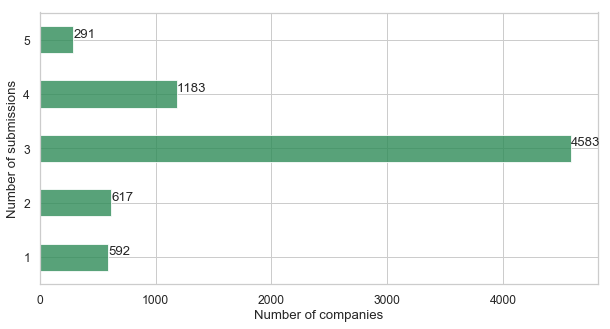

In [1050]:
submissions_count=multiple_reports_check.value_counts().to_frame().sort_index()
submissions_count

# Bring some raw data.
frequencies = submissions_count['Company number'].to_list()

freq_series = pd.Series.from_array(frequencies)

y_labels = [1,2,3,4,5]

# Plot the figure.
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, (ax) = plt.subplots(figsize=(10, 5))


ax = freq_series.plot(kind='barh',color='seagreen')
ax.set_xlabel('Number of companies')
ax.set_ylabel('Number of submissions')
ax.set_yticklabels(y_labels)



# set individual bar labels using above list
for i in ax.patches:
#for rect, label in zip(rects, labels):
    ax.text(i.get_width()+.5, i.get_y()+.3, \
            str(int((i.get_width()))))


# invert for largest on top 
#ax.invert_yaxis()        
plt.show()




In [942]:
test=payments_data.groupby(['Year'])['Company number'].nunique()
test

Year
2017     731
2018    6811
2019    6816
Name: Company number, dtype: int64

In [943]:
#How many unique companies? 
print("Number of unique companies are {}.".format(payments_data['Company number'].nunique()))

Number of unique companies are 7266.


## Answering business questions

### Question 1 What is the average time of companies to pay? 



In [1056]:
x=payments_data['Average time to pay']
x.describe()

count    21762.000000
mean        37.255583
std         25.756987
min          0.000000
25%         25.000000
50%         35.000000
75%         46.000000
max       1000.000000
Name: Average time to pay, dtype: float64

In [1057]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 10000]
labels= ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
new= pd.cut(pd.to_numeric(payments_data['Average time to pay']), bins=bins,labels=labels,include_lowest=False,right=False)
for_pie=new.value_counts().to_frame()
for_pie=for_pie.sort_index().reset_index()
for_pie

,index,Average time to pay
0,0-9,682
1,10-19,2376
2,20-29,4731
3,30-39,5517
4,40-49,4033
5,50-59,2392
6,60-69,1159
7,70-79,491
8,80+,381


In [1058]:
all_bins=for_pie.iloc[:,1].sum()
bins_30_plus=for_pie.iloc[3:,1].sum()
bins_60_plus=for_pie.iloc[6:,1].sum()

print("30+ average pay percentage {}.".format((bins_30_plus/float(all_bins))))
print("60+ average pay percentage {}.".format((bins_60_plus/float(all_bins))))

30+ average pay percentage 0.642082529179.
60+ average pay percentage 0.0933278191343.


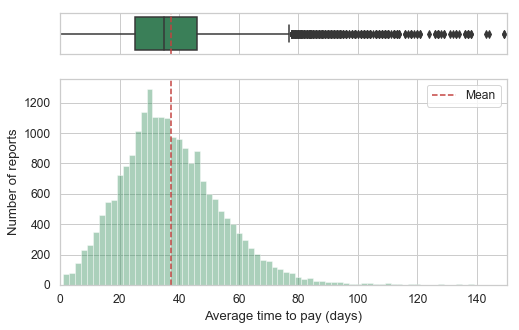

In [1059]:
sns.set(style="whitegrid")
sns.set_context("notebook",font_scale=1.1)

f, (ax_box, ax_hist) = plt.subplots(2, figsize=(8, 5),sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(x, ax=ax_box, color="seagreen")
ax_box.axvline(x.mean(), color='xkcd:reddish', linestyle='--')

sns.distplot(x, bins=range(1, 150, 2),ax=ax_hist,kde=False,color="seagreen")
ax_hist.axvline(x.mean(), color='xkcd:reddish', linestyle='--')

plt.legend({'Mean':x.mean()})
ax_box.set(xlabel='')
ax_box.set_xlim([0, 150])
ax_hist.set_xlim([0, 150])
ax_hist.set(ylabel='Number of reports')
ax_hist.set(xlabel='Average time to pay (days)')
plt.show()



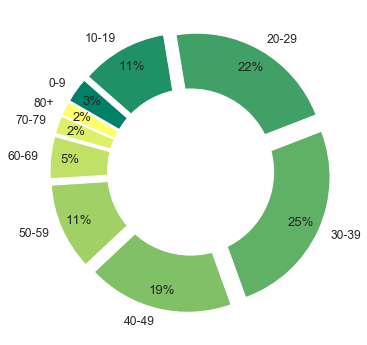

In [1061]:

sns.set(style="darkgrid")
sns.set_context("notebook",font_scale=1.1, rc={"lines.linewidth":2.5})

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']
sizes = [15, 30, 45, 10]

cmap = plt.get_cmap('summer')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
 
plt.pie(for_pie['Average time to pay'], colors=colors, labels=labels, autopct='%1.0f%%', 
        startangle=150, pctdistance=0.85, explode = explode , 
        counterclock=False)


#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
ax_2=fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()



### Question 2: What proportion of invoices are paid late? Has this changed from 2018 to 2019?




In [1074]:
x=payments_data['% Invoices not paid within agreed terms']
x.describe()

count    21762.000000
mean        29.986858
std         24.540749
min          0.000000
25%         10.000000
50%         25.000000
75%         45.000000
max        100.000000
Name: % Invoices not paid within agreed terms, dtype: float64

In [1075]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
labels= ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
new= pd.cut(pd.to_numeric(payments_data['% Invoices not paid within agreed terms']), bins=bins,labels=labels,include_lowest=False,right=False)
for_pie=new.value_counts().to_frame()
for_pie=for_pie.sort_index().reset_index()
for_pie

,index,% Invoices not paid within agreed terms
0,0-9,5252
1,10-19,3910
2,20-29,3365
3,30-39,2701
4,40-49,1976
5,50-59,1387
6,60-69,1155
7,70-79,896
8,80-89,675
9,90-100,445


In [1076]:
all_bins=for_pie.iloc[:,1].sum()
bins_50_plus=for_pie.iloc[5:,1].sum()
bins_90_plus=for_pie.iloc[9:,1].sum()

print("50+ % late payments {}.".format((bins_50_plus/float(all_bins))))
print("90+ % late payments {}.".format((bins_90_plus/float(all_bins))))

50+ % late payments 0.209447661061.
90+ % late payments 0.0204484881904.


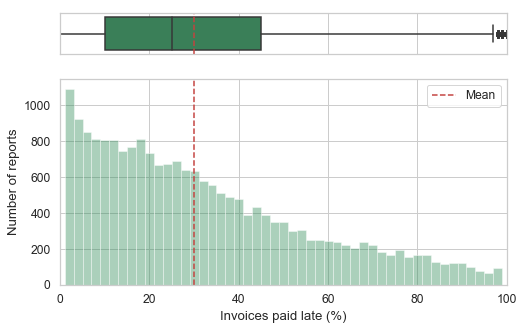

In [1077]:
sns.set(style="whitegrid")
sns.set_context("notebook",font_scale=1.1)

f, (ax_box, ax_hist) = plt.subplots(2, figsize=(8, 5),sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.boxplot(x, ax=ax_box, color="seagreen")
ax_box.axvline(x.mean(), color='xkcd:reddish', linestyle='--')

sns.distplot(x, bins=range(1, 100, 2),ax=ax_hist,kde=False,color="seagreen")
ax_hist.axvline(x.mean(), color='xkcd:reddish', linestyle='--')

plt.legend({'Mean':x.mean()})
ax_box.set(xlabel='')
ax_box.set_xlim([0, 100])
ax_hist.set_xlim([0, 100])
ax_hist.set(ylabel='Number of reports')
ax_hist.set(xlabel='Invoices paid late (%)')
plt.show()




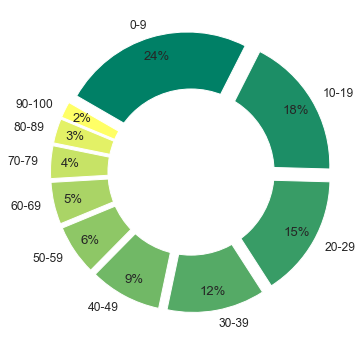

In [1078]:


sns.set_context("notebook",font_scale=1.1, rc={"lines.linewidth":2.5})

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(aspect="equal"))

labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']


cmap = plt.get_cmap('summer')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
 
plt.pie(for_pie['% Invoices not paid within agreed terms'], colors=colors, labels=labels, autopct='%1.0f%%', 
        startangle=150, pctdistance=0.85, explode = explode , 
        counterclock=False)


#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
ax_2=fig.gca().add_artist(centre_circle)


plt.tight_layout()
plt.show()






### Question 3: Performance of companies that participate in a payment code

In [1015]:
PPC=payments_data[payments_data['Participates in payment codes']==1]
no_PPC=payments_data[payments_data['Participates in payment codes']==0]


print("% in PPC {}.".format((len(PPC)/float(len(payments_data)))))
print("% not in PPC {}.".format((len(no_PPC)/float(len(payments_data)))))


% in PPC 0.0879055233894.
% not in PPC 0.912094476611.


In [1016]:
x=payments_data[['Average time to pay','Participates in payment codes']]
y=payments_data[['% Invoices not paid within agreed terms','Participates in payment codes']]


In [1017]:
df_x=x.groupby('Participates in payment codes').describe().reset_index()
df_x

Participates in payment codes Average time to pay                        \
                                              count       mean        std   
0                         False             19849.0  37.536047  26.478340   
1                          True              1913.0  34.345531  16.227505   

                                  
   min   25%   50%   75%     max  
0  0.0  25.0  35.0  47.0  1000.0  
1  0.0  24.0  32.0  42.0   244.0

In [1018]:
df_y=y.groupby('Participates in payment codes').describe().reset_index()
df_y

Participates in payment codes % Invoices not paid within agreed terms  \
                                                                  count   
0                         False                                 19849.0   
1                          True                                  1913.0   

                                                       
        mean        std  min   25%   50%   75%    max  
0  30.451761  24.791545  0.0  10.0  25.0  45.0  100.0  
1  25.163095  21.180277  0.0   9.0  20.0  35.0  100.0

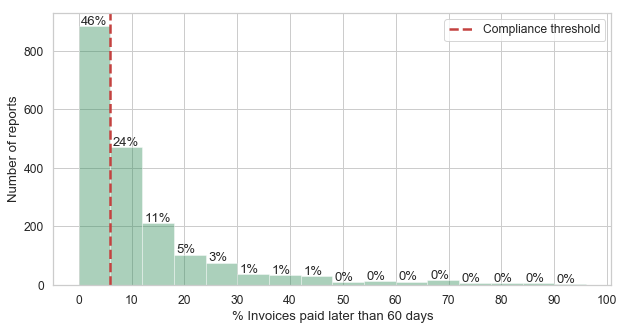

In [1064]:
sns.set(style="whitegrid")
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, (ax_hist) = plt.subplots(figsize=(10, 5))#, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})

sns.distplot(df_ppc['% Invoices paid later than 60 days'], bins=range(0, 100, 6),ax=ax_hist,kde=False,color="seagreen")
ax_hist.axvline(6, color='xkcd:reddish', linestyle='--')

plt.legend({'Compliance threshold':6})#,'Median':x.median(),'Upper quartile':np.percentile(x,75)})#,'Mode':mode})
#ax_box.set(xlabel='')
#ax_box.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_hist.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax_box.set_xlim([0, 150])
#ax_hist.set_xlim([0, 150])
ax_hist.set(ylabel='Number of reports')


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax_hist.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax_hist.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_hist.text(i.get_x()+.5, i.get_height()+5, \
            str(int((i.get_height()/total)*100))+'%')        
              

plt.show()



In [1021]:
df_x=x.groupby('Participates in payment codes').describe().reset_index()


In [1022]:
df_ppc['Compliant with PPC']=np.where(df_ppc['% Invoices paid later than 60 days']<=5, 'True','False')
#np.percentile(df_ppc_test,5)
df_ppc_compliance=df_ppc['Compliant with PPC'].value_counts().to_frame()
#test=df_ppc_test.groupby('Participates in payment codes').describe()#.reset_index()
df_ppc_compliance['Percent']=df_ppc_compliance['Compliant with PPC']/len(df_ppc)
df_ppc_compliance

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compliant with PPC,Percent
False,1028,0.537376
True,885,0.462624


### Question 4: Impact of financial solutions offerings 


In [1044]:
E_invoicing=payments_data[payments_data['E-Invoicing offered']==1]
no_E_invoicing=payments_data[payments_data['E-Invoicing offered']==0]


print("% offers E_invoicing {}.".format((len(E_invoicing)/float(len(payments_data)))))
print("% does not offer E_invoicing {}.".format((len(no_E_invoicing)/float(len(payments_data)))))

SCF=payments_data[payments_data['Supply-chain financing offered']==1]
no_SCF=payments_data[payments_data['Supply-chain financing offered']==0]


print("% offers SCF {}.".format((len(SCF)/float(len(payments_data)))))
print("% does not offer SCF {}.".format((len(no_SCF)/float(len(payments_data)))))



% offers E_invoicing 0.238581012775.
% does not offer E_invoicing 0.761418987225.
% offers SCF 0.067135373587.
% does not offer SCF 0.932864626413.


In [1024]:
x_e_invoicing=payments_data[['Average time to pay','E-Invoicing offered']]
y_e_invoicing=payments_data[['% Invoices not paid within agreed terms','E-Invoicing offered']]

x_supply_chain_fin=payments_data[['Average time to pay','Supply-chain financing offered']]
y_supply_chain_fin=payments_data[['% Invoices not paid within agreed terms','Supply-chain financing offered']]



In [1025]:
df_x_e_invoicing=x_e_invoicing.groupby('E-Invoicing offered').describe().reset_index()
df_x_e_invoicing

E-Invoicing offered Average time to pay                                   \
                                    count       mean        std  min   25%   
0               False             16570.0  36.446832  27.199022  0.0  24.0   
1                True              5192.0  39.836672  20.274458  0.0  28.0   

                       
    50%   75%     max  
0  34.0  45.0  1000.0  
1  37.0  50.0   514.0

In [1026]:
df_y_e_invoicing=y_e_invoicing.groupby('E-Invoicing offered').describe().reset_index()
df_y_e_invoicing

E-Invoicing offered % Invoices not paid within agreed terms             \
                                                        count       mean   
0               False                                 16570.0  30.582861   
1                True                                  5192.0  28.084746   

                                            
         std  min   25%   50%   75%    max  
0  24.868935  0.0  10.0  25.0  46.0  100.0  
1  23.363513  0.0  10.0  22.0  41.0  100.0

In [1034]:
df_e_invoicing=payments_data[payments_data['E-Invoicing offered']==1]
df_no_e_invoicing=payments_data[payments_data['E-Invoicing offered']==0]

bins = range(0, 100, 9)
bins

[0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99]

In [1037]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
labels= ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
new= pd.cut(pd.to_numeric(payments_data['% Invoices not paid within agreed terms']), bins=bins,labels=labels,include_lowest=False,right=False)
for_pie=new.value_counts().to_frame()
for_pie=for_pie.sort_index().reset_index()
for_pie.sum()

index                                      0-910-1920-2930-3940-4950-5960-6970-7980-8990-100
% Invoices not paid within agreed terms                                                21762
dtype: object

(0, 140)

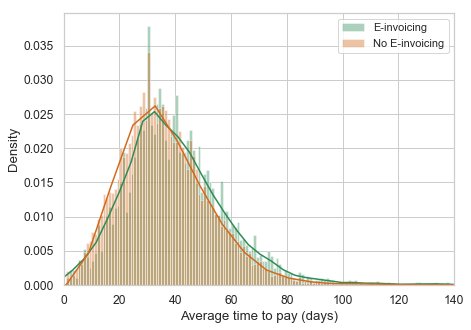

In [1038]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, ax = plt.subplots(figsize=(7, 5))
sns.set(style="whitegrid")
sns.distplot(payments_data[payments_data['E-Invoicing offered']==1]['Average time to pay'],color='seagreen',label='E-invoicing',bins=range(1, 140, 1))
sns.distplot(payments_data[payments_data['E-Invoicing offered']==0]['Average time to pay'],color='chocolate',label='No E-invoicing',bins=range(1, 140, 1))
#plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Average time to pay (days)')
plt.ylabel('Density')
ax.set_xlim([0, 140])

(0, 100)

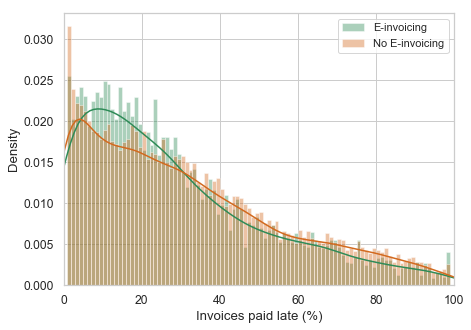

In [1039]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, ax = plt.subplots(figsize=(7, 5))
sns.set(style="whitegrid")
sns.distplot(payments_data[payments_data['E-Invoicing offered']==1]['% Invoices not paid within agreed terms'],color='seagreen',label='E-invoicing',bins=range(1, 100, 1))
sns.distplot(payments_data[payments_data['E-Invoicing offered']==0]['% Invoices not paid within agreed terms'],color='chocolate',label='No E-invoicing',bins=range(1, 100, 1))
#plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Invoices paid late (%)')
plt.ylabel('Density')
ax.set_xlim([0, 100])

In [1040]:
df_x_supply_chain_fin=x_supply_chain_fin.groupby('Supply-chain financing offered').describe().reset_index()
df_x_supply_chain_fin

Supply-chain financing offered Average time to pay                        \
                                               count       mean        std   
0                          False             20301.0  36.435200  25.862836   
1                           True              1461.0  48.655031  21.178080   

                                  
   min   25%   50%   75%     max  
0  0.0  25.0  34.0  45.0  1000.0  
1  1.0  34.0  47.0  61.0   176.0

In [1041]:
df_y_supply_chain_fin=y_supply_chain_fin.groupby('Supply-chain financing offered').describe().reset_index()
df_y_supply_chain_fin

Supply-chain financing offered % Invoices not paid within agreed terms  \
                                                                   count   
0                          False                                 20301.0   
1                           True                                  1461.0   

                                                       
        mean        std  min   25%   50%   75%    max  
0  29.974533  24.624994  0.0  10.0  25.0  45.0  100.0  
1  30.158111  23.346064  0.0  12.0  24.0  42.0  100.0

(0, 140)

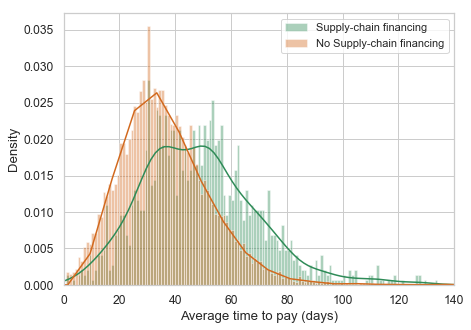

In [681]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, ax = plt.subplots(figsize=(7, 5))
sns.set(style="whitegrid")
sns.distplot(payments_data[payments_data['Supply-chain financing offered']==1]['Average time to pay'],color='seagreen',label='Supply-chain financing',bins=range(1, 140, 1))
sns.distplot(payments_data[payments_data['Supply-chain financing offered']==0]['Average time to pay'],color='chocolate',label='No Supply-chain financing',bins=range(1, 140, 1))
#plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Average time to pay (days)')
plt.ylabel('Density')
ax.set_xlim([0, 140])

(0, 100)

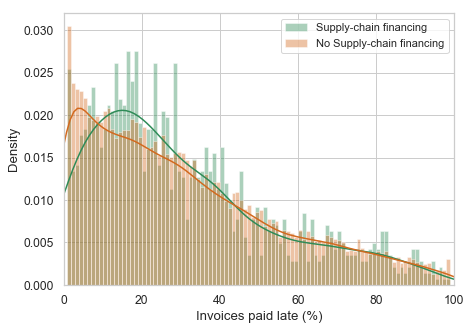

In [687]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, ax = plt.subplots(figsize=(7, 5))
sns.set(style="whitegrid")
sns.distplot(payments_data[payments_data['Supply-chain financing offered']==1]['% Invoices not paid within agreed terms'],color='seagreen',label='Supply-chain financing',bins=range(1, 100, 1))
sns.distplot(payments_data[payments_data['Supply-chain financing offered']==0]['% Invoices not paid within agreed terms'],color='chocolate',label='No Supply-chain financing',bins=range(1, 100, 1))
#plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Invoices paid late (%)')
plt.ylabel('Density')
ax.set_xlim([0, 100])

### Question 5: are we noticing any improvement in payment practices?

In [ ]:
fig, ax = plt.subplots()
for a in [df_18['Average time to pay'], df_19['Average time to pay']]:
    sns.distplot(a, bins=range(1, 110, 1), ax=ax)#, kde=False)
ax.set_xlim([0, 100])



(0, 140)

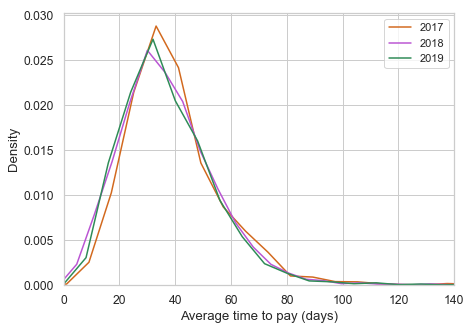

In [715]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, ax = plt.subplots(figsize=(7, 5))
sns.set(style="whitegrid")
sns.distplot(payments_data[payments_data['Year']==2017]['Average time to pay'],color='chocolate',label='2017',bins=range(1, 140, 1),hist=False)
sns.distplot(payments_data[payments_data['Year']==2018]['Average time to pay'],color='mediumorchid',label='2018',bins=range(1, 140, 1),hist=False)
sns.distplot(payments_data[payments_data['Year']==2019]['Average time to pay'],color='seagreen',label='2019',bins=range(1, 140, 1),hist=False)
#plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Average time to pay (days)')
plt.ylabel('Density')
ax.set_xlim([0, 140])

(0, 100)

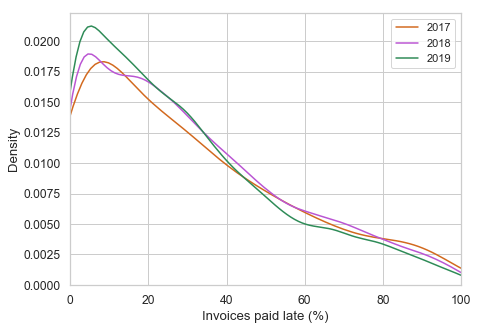

In [717]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, ax = plt.subplots(figsize=(7, 5))
sns.set(style="whitegrid")
sns.distplot(payments_data[payments_data['Year']==2017]['% Invoices not paid within agreed terms'],color='chocolate',label='2017',bins=range(1, 100, 1),hist=False)
sns.distplot(payments_data[payments_data['Year']==2018]['% Invoices not paid within agreed terms'],color='mediumorchid',label='2018',bins=range(1, 100, 1),hist=False)
sns.distplot(payments_data[payments_data['Year']==2019]['% Invoices not paid within agreed terms'],color='seagreen',label='2019',bins=range(1, 100, 1),hist=False)
#plt.title('Url Length Distribution')
plt.legend(loc='upper right')
plt.xlabel('Invoices paid late (%)')
plt.ylabel('Density')
ax.set_xlim([0, 100])

In [721]:
x_year=payments_data[['Average time to pay','% Invoices paid within 30 days',
                      '% Invoices paid between 31 and 60 days',
                      '% Invoices paid later than 60 days',
                      '% Invoices not paid within agreed terms','Year']]

df_y_year=x_year.groupby('Year').mean().reset_index()

df_y_year.rename(columns={'% Invoices not paid within agreed terms':'Invoices paid late (%)',
                         'Average time to pay':'Average time to pay (days)',
                         '% Invoices paid within 30 days': 'Invoices paid in 30 days (%)'  ,
                         '% Invoices paid between 31 and 60 days': 'Invoices paid late (%)'  ,
                         '% Invoices paid later than 60 days': 'Invoices paid late (%)'
                         
                                                                          
                         }, inplace=True)

df_y_year.round()

,Year,Average time to pay (days),Invoices paid late (%)
0,2017,44.0,30.0
1,2018,37.0,31.0
2,2019,37.0,29.0


In [757]:
y_year=payments_data[['% Invoices paid within 30 days','% Invoices paid between 31 and 60 days',
                      '% Invoices paid later than 60 days','Year']]

df_y_year=y_year.groupby('Year').mean().reset_index()

df_y_year.round()






,Year,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days
0,2017,50.0,34.0,15.0
1,2018,53.0,32.0,15.0
2,2019,55.0,31.0,14.0


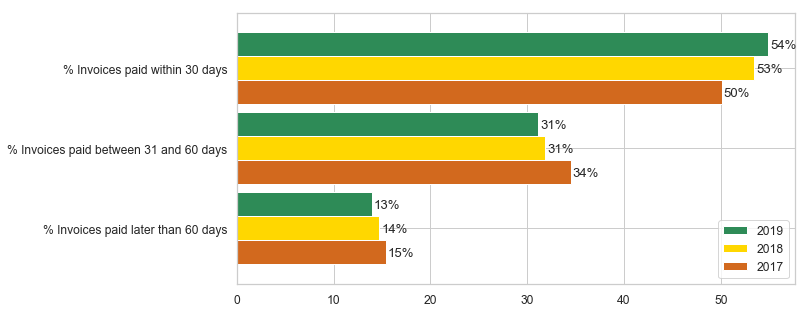

In [1069]:
sns.set_context("notebook",
font_scale=1.1, rc={"lines.linewidth":2.5})

f, (ax) = plt.subplots(figsize=(10, 5))



payment_percents = ['% Invoices paid within 30 days','% Invoices paid between 31 and 60 days',
                      '% Invoices paid later than 60 days'] #create a list from the first dimension of data
year_1  = list(df_y_year.iloc[0,-3:]) #create a list from the second dimension of data (2018 popularity)
year_2  = list(df_y_year.iloc[1,-3:]) #create a list from the second dimension of data (2017 popularity)
year_3  = list(df_y_year.iloc[2,-3:])

ind = np.arange(len(df_y_year))
width=0.3 
ax = plt.subplot(111)
rects1=ax.barh(ind,year_3,width,color='seagreen',label='2019')
rects2=ax.barh(ind+width,year_2,width,color='gold',label='2018')
rects3=ax.barh(ind+width*2,year_1,width,color='chocolate',label='2017')

ax.set(yticks=ind + width, yticklabels=payment_percents, ylim=[2*width - 1, len(df_y_year)])
ax.legend()


# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.2, i.get_y()+.2, \
            str(int((i.get_width())))+'%')


        
# invert for largest on top 
ax.invert_yaxis()        
plt.show()


